# Neurons and Multi-Layer Perceptron (MLP)

In this notebook, we will understand the basic building block of deep learning — the **neuron** — and how multiple neurons form a **Multi-Layer Perceptron (MLP)**.

We will:
- Explore the Iris dataset
- Visualize feature relationships
- Prepare the data for a neural network
- Build and train a simple MLP model


In [2]:
!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Loading the Iris Dataset

The Iris dataset is a classic dataset used for classification tasks.
It contains:
- 150 samples
- 4 numerical features
- 3 output classes

In [3]:
iris = load_iris()

X = iris.data
y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Understanding the Dataset

Let us check:
- Shape of the dataset
- Feature names
- Class labels

In [5]:
#Dataset Inspection
print("Dataset shape:", df.shape)
print("\nFeature names:", feature_names)
print("\nTarget classes:", target_names)
df.describe()

Dataset shape: (150, 5)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target classes: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


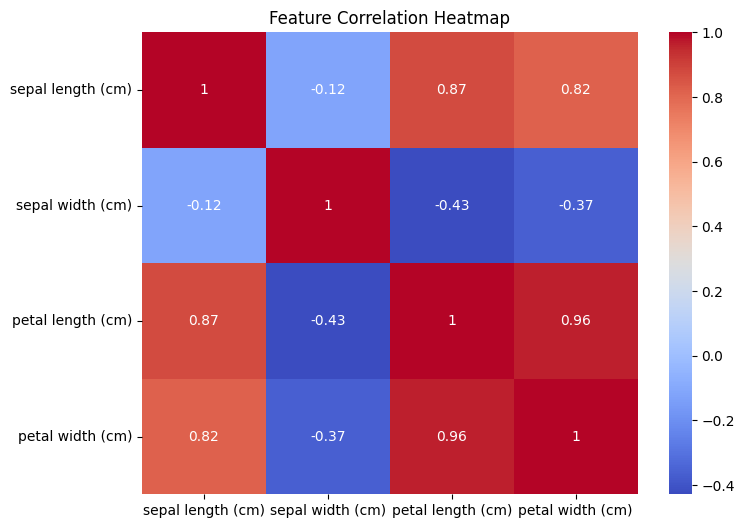

In [6]:
#Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

## The Perceptron: A Single Artificial Neuron

A **perceptron** is the simplest form of a neural network.
It consists of:
- Input features
- Weights
- Bias
- An activation function

Mathematically, a perceptron computes:

\[
z = w_1x_1 + w_2x_2 + \dots + w_nx_n + b
\]

The output is obtained by applying an activation function:

\[
\hat{y} = f(z)
\]

Originally, the perceptron was designed for **binary classification**.



## Preparing a Binary Iris Dataset

We will classify:
- Class 0 → Setosa
- Class 1 → Non-Setosa (Versicolor + Virginica)

In [9]:

# Convert to binary classification
#Train Test Split
y_binary = (y == 0).astype(int)

print("Class distribution:", np.bincount(y_binary))
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

scaler = StandardScaler()
X_train_b = scaler.fit_transform(X_train_b)
X_test_b = scaler.transform(X_test_b)

Class distribution: [100  50]


In [10]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(
    max_iter=1000,
    eta0=0.01,
    random_state=42
)

perceptron.fit(X_train_b, y_train_b)

,"penalty penalty: {'l2','l1','elasticnet'}, default=NoneThe penalty (aka regularization term) to be used.",None
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term if regularization isused.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with `0 <= l1_ratio <= 1`.`l1_ratio=0` corresponds to L2 penalty, `l1_ratio=1` to L1.Only used if `penalty='elasticnet'`... versionadded:: 0.24",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, the iterations will stopwhen (loss > previous_loss - tol)... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.",0
,"eta0 eta0: float, default=1Constant by which the updates are multiplied.",0.01
,"n_jobs n_jobs: int, default=NoneThe number of CPUs to use to do the OVA (One Versus All, formulti-class problems) computation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"random_state random_state: int, RandomState instance or None, default=0Used to shuffle the training data, when ``shuffle`` is set to``True``. Pass an int for reproducible output across multiplefunction calls.See :term:`Glossary `.",42


## Evaluating the Perceptron

We evaluate the model using accuracy on the test set.

In [11]:
from sklearn.metrics import accuracy_score

y_pred = perceptron.predict(X_test_b)
accuracy = accuracy_score(y_test_b, y_pred)

print("Perceptron Test Accuracy:", accuracy)

Perceptron Test Accuracy: 0.9666666666666667


## Confusion Matrix

This helps us understand correct and incorrect predictions.

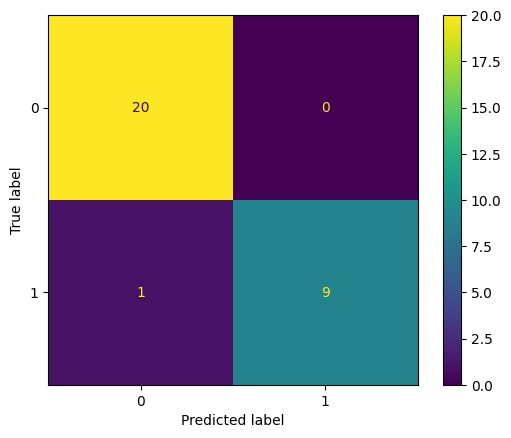

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_b, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Understanding Learned Weights

Each weight represents the importance of a feature.
Higher magnitude → greater influence on the decision.

In [13]:
for feature, weight in zip(feature_names, perceptron.coef_[0]):
    print(f"{feature}: {weight:.4f}")

print("Bias:", perceptron.intercept_[0])

sepal length (cm): -0.0069
sepal width (cm): 0.0277
petal length (cm): -0.0129
petal width (cm): -0.0056
Bias: -0.02


## Key Observations

- The perceptron learns a **linear decision boundary**
- It works well only if data is linearly separable
- It cannot handle complex, non-linear patterns

This limitation motivates the need for:
➡️ **Multi-Layer Perceptrons (MLPs)** with hidden layers and non-linear activation functions

In [14]:
# True if Setosa, False otherwise
y_bool = (y == 0)

print("Label examples:", y_bool[:10])
print("Class counts:", np.unique(y_bool, return_counts=True))
X_train, X_test, y_train, y_test = train_test_split(
    X, y_bool, test_size=0.2, random_state=42, stratify=y_bool
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.linear_model import Perceptron

perceptron = Perceptron(
    max_iter=1000,
    eta0=0.01,
    random_state=42
)

perceptron.fit(X_train, y_train)
y_pred_bool = perceptron.predict(X_test)

print("Predictions:", y_pred_bool[:10])
print("Actual:", y_test[:10])

Label examples: [ True  True  True  True  True  True  True  True  True  True]
Class counts: (array([False,  True]), array([100,  50]))
Predictions: [False  True False False False False False False  True False]
Actual: [False  True False False False False False False  True False]


In [15]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_bool)
print("Perceptron Accuracy:", accuracy)

Perceptron Accuracy: 0.9666666666666667


The `Perceptron` is equivalent to a `SGDClassifier` with `loss="perceptron"`, no regularization, and a constant learning rate equal to 1:

## Perceptron vs SGDClassifier

The `Perceptron` model in scikit-learn is equivalent to using
`SGDClassifier` with:
- loss = "perceptron"
- no regularization
- constant learning rate

Let us verify this experimentally.

In [16]:
#train perceptron

from sklearn.linear_model import Perceptron

perc = Perceptron(
    max_iter=1000,
    eta0=1.0,
    random_state=42
)

perc.fit(X_train, y_train)

y_pred_perc = perc.predict(X_test)

In [17]:
#train sgd

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(
    loss="perceptron",
    penalty=None,
    learning_rate="constant",
    eta0=1.0,
    max_iter=1000,
    random_state=42
)

sgd.fit(X_train, y_train)

y_pred_sgd = sgd.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

acc_perc = accuracy_score(y_test, y_pred_perc)
acc_sgd = accuracy_score(y_test, y_pred_sgd)

print("Perceptron Accuracy:", acc_perc)
print("SGDClassifier Accuracy:", acc_sgd)

Perceptron Accuracy: 0.9666666666666667
SGDClassifier Accuracy: 0.9666666666666667


In [19]:
np.all(y_pred_perc == y_pred_sgd)

np.True_

In [20]:
print("Perceptron weights:", perc.coef_)
print("SGD weights:", sgd.coef_)

print("Perceptron bias:", perc.intercept_)
print("SGD bias:", sgd.intercept_)

Perceptron weights: [[-0.68917536  2.77445652 -1.29480379 -0.56276422]]
SGD weights: [[-0.68917536  2.77445652 -1.29480379 -0.56276422]]
Perceptron bias: [-2.]
SGD bias: [-2.]


## Key Takeaway

- Perceptron is a special case of SGD
- Modern deep learning is essentially SGD + better loss functions
- Understanding SGD helps understand neural networks

This connects classical machine learning to modern deep learning.

The perceptron stops updating weights as soon as it finds any separating line.
It does not try to maximize margin — so the boundary can lie very close to one class. This is why SVMs and MLPs exist.
This visualization only works with 2 features.

So we must:
	•	Use petal length and petal width
	•	Use binary classification (Setosa vs Not Setosa)

In [21]:
# Use only two features for visualization
X_2d = X[:, (2, 3)]  # petal length, petal width

# Binary classification: Setosa vs Not Setosa
y_binary = (y == 0).astype(int)

In [22]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_2d, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

per_clf = Perceptron(
    max_iter=1000,
    eta0=1.0,
    random_state=42
)

per_clf.fit(X_train_scaled, y_train)

,"penalty penalty: {'l2','l1','elasticnet'}, default=NoneThe penalty (aka regularization term) to be used.",None
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term if regularization isused.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with `0 <= l1_ratio <= 1`.`l1_ratio=0` corresponds to L2 penalty, `l1_ratio=1` to L1.Only used if `penalty='elasticnet'`... versionadded:: 0.24",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, the iterations will stopwhen (loss > previous_loss - tol)... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.",0
,"eta0 eta0: float, default=1Constant by which the updates are multiplied.",1.0
,"n_jobs n_jobs: int, default=NoneThe number of CPUs to use to do the OVA (One Versus All, formulti-class problems) computation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"random_state random_state: int, RandomState instance or None, default=0Used to shuffle the training data, when ``shuffle`` is set to``True``. Pass an int for reproducible output across multiplefunction calls.See :term:`Glossary `.",42


In [23]:
# Extract weights
w = per_clf.coef_[0]
b = per_clf.intercept_[0]

# Line parameters: x2 = a*x1 + c
a = -w[0] / w[1]
c = -b / w[1]

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500),
    np.linspace(axes[2], axes[3], 200)
)

X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_scaled = scaler.transform(X_new)

y_predict = per_clf.predict(X_new_scaled)
zz = y_predict.reshape(x0.shape)


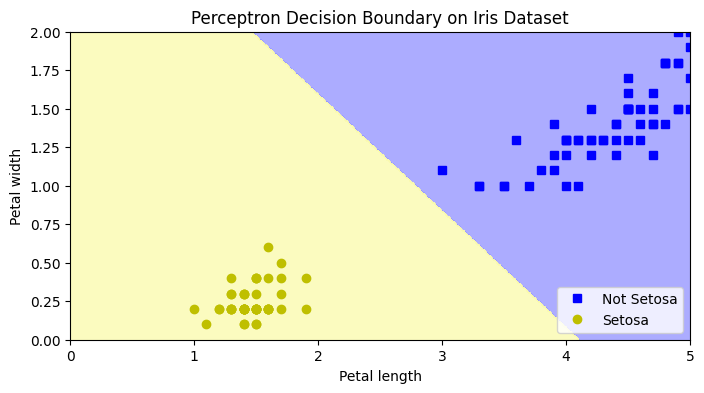

In [25]:
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(8, 4))

# Decision regions
plt.contourf(x0, x1, zz, cmap=custom_cmap, alpha=0.8)

# Data points
plt.plot(X_2d[y_binary == 0, 0], X_2d[y_binary == 0, 1],
         "bs", label="Not Setosa")
plt.plot(X_2d[y_binary == 1, 0], X_2d[y_binary == 1, 1],
         "yo", label="Setosa")

# Decision boundary
plt.plot([axes[0], axes[1]],
         [a * axes[0] + c, a * axes[1] + c],
         "k-", linewidth=3)

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.title("Perceptron Decision Boundary on Iris Dataset")
plt.show()

## Interpretation of the Decision Boundary

- The perceptron stops learning once the classes are separated
- It does **not** maximize the margin between classes
- As a result, the decision boundary may lie very close to one class

This limitation motivates more advanced models such as:
- Support Vector Machines (SVM)
- Multi-Layer Perceptrons (MLPs)

## Activation Functions

An activation function decides whether a neuron should "fire" or not.
Without activation functions, a neural network would behave like a simple
linear model, no matter how many layers it has.

In this section, we visualize:
- Heaviside (Step function)
- ReLU
- Sigmoid
- Tanh

We also visualize their **derivatives**, which are crucial for learning using
backpropagation.

### Why Do We Care About Derivatives?

During training, neural networks update weights using **gradient descent**.
Gradients are computed using **derivatives of activation functions**.

If the derivative is:
- Zero → learning stops
- Very small → learning becomes slow (vanishing gradient)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid
from matplotlib.colors import ListedColormap
# Activation functions
def relu(z):
    return np.maximum(0, z)

# Numerical derivative (for visualization)
def derivative(f, z, eps=1e-6):
    return (f(z + eps) - f(z - eps)) / (2 * eps)

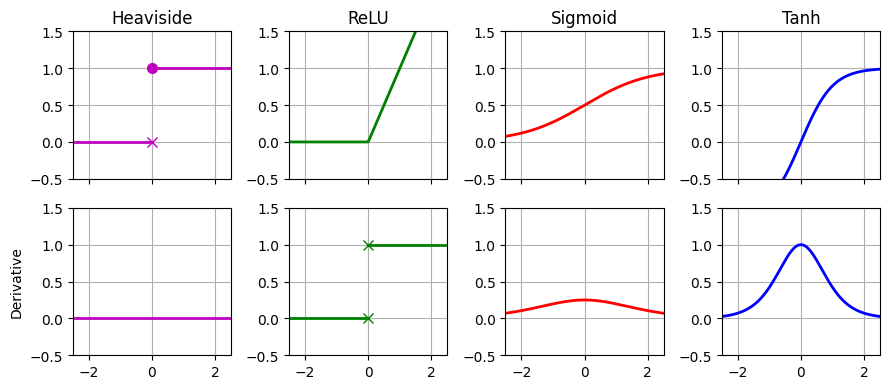

In [28]:
max_z = 2.5
z = np.linspace(-max_z, max_z, 200)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(9, 4))

# Heaviside (Step function)
axes[0, 0].plot([-max_z, 0], [0, 0], "m-", linewidth=2)
axes[0, 0].plot(0, 0, "mx", markersize=7)
axes[0, 0].plot(0, 1, "mo", markersize=7)
axes[0, 0].plot([0, max_z], [1, 1], "m-", linewidth=2)
axes[0, 0].set_title("Heaviside")

axes[1, 0].plot(z, derivative(np.sign, z), "m-", linewidth=2)
axes[1, 0].set_ylabel("Derivative")

# ReLU
axes[0, 1].plot(z, relu(z), "g-", linewidth=2)
axes[0, 1].set_title("ReLU")

axes[1, 1].plot([-max_z, 0], [0, 0], "g-", linewidth=2)
axes[1, 1].plot([0, max_z], [1, 1], "g-", linewidth=2)
axes[1, 1].plot(0, 0, "gx", markersize=7)
axes[1, 1].plot(0, 1, "gx", markersize=7)

# Sigmoid
axes[0, 2].plot(z, sigmoid(z), "r-", linewidth=2)
axes[0, 2].set_title("Sigmoid")

axes[1, 2].plot(z, derivative(sigmoid, z), "r-", linewidth=2)

# Tanh
axes[0, 3].plot(z, np.tanh(z), "b-", linewidth=2)
axes[0, 3].set_title("Tanh")

axes[1, 3].plot(z, derivative(np.tanh, z), "b-", linewidth=2)

# Formatting
for row in range(2):
    for col in range(4):
        axes[row, col].grid(True)
        if row == 0:
            axes[row, col].set_xticklabels([])
        axes[row, col].set_xlim(-max_z, max_z)
        axes[row, col].set_ylim(-0.5, 1.5)

plt.tight_layout()
plt.show()

## Key Takeaway

Activation functions introduce **non-linearity**.
Without them:
- Multi-layer networks collapse into linear models
- Complex patterns cannot be learned

This is what allows Multi-Layer Perceptrons to outperform the perceptron.

## Multi-Layer Perceptron (MLP) for Classification

A Multi-Layer Perceptron (MLP) consists of:
- An input layer
- One or more hidden layers
- An output layer

Unlike the perceptron, MLPs use **non-linear activation functions** and are trained
using **backpropagation**, allowing them to learn complex decision boundaries.

We start with a classification task using the Iris dataset.

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### MLP Architecture

- Hidden layers: (10, 10)
- Activation: ReLU
- Output: Softmax (handled internally)

In [32]:
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(10, 10),
    activation="relu",
    solver="adam",
    max_iter=1000,
    random_state=42
)

mlp_clf.fit(X_train_scaled, y_train)

,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","(10, ...)"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_training_curves.py`.Note: The default solver 'adam' works pretty well on relativelylarge datasets (with thousands of training samples or more) in terms ofboth training time and validation score.For small datasets, however, 'lbfgs' can converge faster and performbetter.",'adam'
,"alpha alpha: float, default=0.0001Strength of the L2 regularization term. The L2 regularization termis divided by the sample size when added to the loss.For an example usage and visualization of varying regularization, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_alpha.py`.",0.0001
,"batch_size batch_size: int, default='auto'Size of minibatches for stochastic optimizers.If the solver is 'lbfgs', the classifier will not use minibatch.When set to ""auto"", `batch_size=min(200, n_samples)`.",'auto'
,"learning_rate learning_rate: {'constant', 'invscaling', 'adaptive'}, default='constant'Learning rate schedule for weight updates.- 'constant' is a constant learning rate given by 'learning_rate_init'.- 'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)- 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.Only used when ``solver='sgd'``.",'constant'
,"learning_rate_init learning_rate_init: float, default=0.001The initial learning rate used. It controls the step-sizein updating the weights. Only used when solver='sgd' or 'adam'.",0.001
,"power_t power_t: float, default=0.5The exponent for inverse scaling learning rate.It is used in updating effective learning rate when the learning_rateis set to 'invscaling'. Only used when solver='sgd'.",0.5
,"max_iter max_iter: int, default=200Maximum number of iterations. The solver iterates until convergence(determined by 'tol') or this number of iterations. For stochasticsolvers ('sgd', 'adam'), note that this determines the number of epochs(how many times each data point will be used), not the number ofgradient steps.",1000
,"shuffle shuffle: bool, default=TrueWhether to shuffle samples in each iteration. Only used whensolver='sgd' or 'adam'.",True
,"random_state random_state: int, RandomState instance, default=NoneDetermines random number generation for weights and biasinitialization, train-test split if early stopping is used, and batchsampling when solver='sgd' or 'adam'.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42


In [33]:
y_pred = mlp_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Interpretation

- The MLP successfully learns non-linear decision boundaries
- Performance is significantly better than a single perceptron
- Hidden layers enable representation learning

MLP for Regression (California Housing Dataset)

## Multi-Layer Perceptron (MLP) for Regression

MLPs are not limited to classification.
They can also be used for **regression**, where the goal is to predict a
continuous value.

We demonstrate this using the California Housing dataset.

In [35]:
import pandas as pd

housing_df = pd.DataFrame(
    X_housing,
    columns=housing.feature_names
)
housing_df["MedianHouseValue"] = y_housing

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [36]:
housing_df.info()
housing_df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedInc            20640 non-null  float64
 1   HouseAge          20640 non-null  float64
 2   AveRooms          20640 non-null  float64
 3   AveBedrms         20640 non-null  float64
 4   Population        20640 non-null  float64
 5   AveOccup          20640 non-null  float64
 6   Latitude          20640 non-null  float64
 7   Longitude         20640 non-null  float64
 8   MedianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


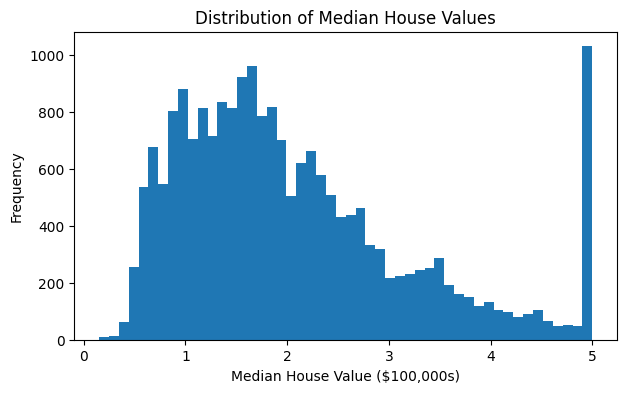

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.hist(housing_df["MedianHouseValue"], bins=50)
plt.xlabel("Median House Value ($100,000s)")
plt.ylabel("Frequency")
plt.title("Distribution of Median House Values")
plt.show()

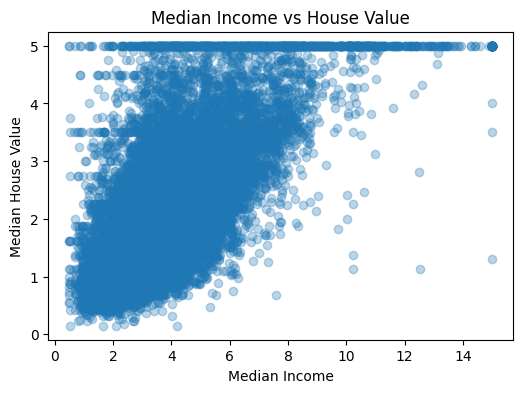

In [38]:
plt.figure(figsize=(6,4))
plt.scatter(
    housing_df["MedInc"],
    housing_df["MedianHouseValue"],
    alpha=0.3
)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median Income vs House Value")
plt.show()

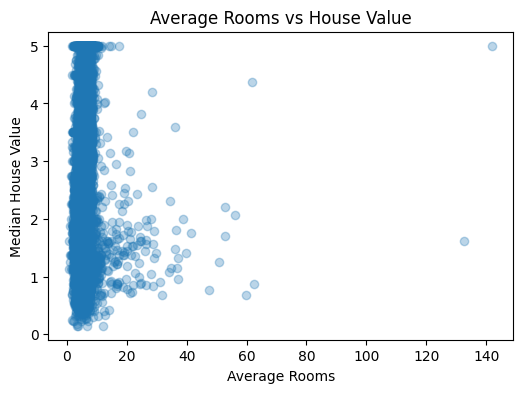

In [39]:
plt.figure(figsize=(6,4))
plt.scatter(
    housing_df["AveRooms"],
    housing_df["MedianHouseValue"],
    alpha=0.3
)
plt.xlabel("Average Rooms")
plt.ylabel("Median House Value")
plt.title("Average Rooms vs House Value")
plt.show()

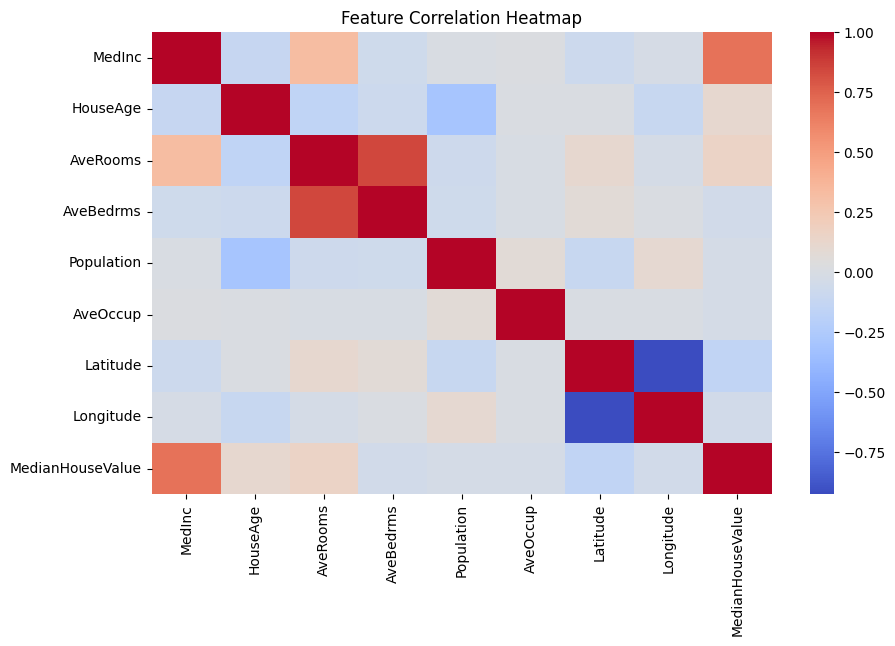

In [40]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(
    housing_df.corr(),
    cmap="coolwarm",
    annot=False
)
plt.title("Feature Correlation Heatmap")
plt.show()

Key point:
	•	Correlation ≠ causation
	•	Neural networks learn non-linear interactions

In [45]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [46]:
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

	•	hidden_layer_sizes=[50, 50, 50]
	•	Three hidden layers
	•	50 neurons in each layer
	•	early_stopping=True
	•	Automatically splits training data into:
	•	Training set
	•	Validation set
	•	Stops training when validation error stops improving
	•	verbose=True
	•	Shows training progress (loss per epoch)


In [47]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], early_stopping=True,
                       verbose=True, random_state=42)

	•	Neural networks are sensitive to feature scale
	•	StandardScaler normalizes features
	•	Pipeline ensures:
	•	No data leakage
	•	Cleaner, safer code
	•	Scaling applied consistently during training and prediction
	•	Scaler is fit only on training data
	•	MLP is trained using backpropagation
	•	Early stopping monitors validation performance


In [48]:
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)

Iteration 1, loss = 0.85190332
Validation score: 0.534299
Iteration 2, loss = 0.28288639
Validation score: 0.651094
Iteration 3, loss = 0.22884372
Validation score: 0.699782
Iteration 4, loss = 0.20746145
Validation score: 0.720468
Iteration 5, loss = 0.19649383
Validation score: 0.724839
Iteration 6, loss = 0.18928708
Validation score: 0.740084
Iteration 7, loss = 0.18132029
Validation score: 0.747406
Iteration 8, loss = 0.17556450
Validation score: 0.753945
Iteration 9, loss = 0.17190651
Validation score: 0.760500
Iteration 10, loss = 0.16687650
Validation score: 0.759213
Iteration 11, loss = 0.16329479
Validation score: 0.761907
Iteration 12, loss = 0.16054473
Validation score: 0.768950
Iteration 13, loss = 0.15690181
Validation score: 0.762699
Iteration 14, loss = 0.15630644
Validation score: 0.766003
Iteration 15, loss = 0.15712517
Validation score: 0.778464
Iteration 16, loss = 0.15155981
Validation score: 0.774237
Iteration 17, loss = 0.14957641
Validation score: 0.778361
Iterat

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('mlpregressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"loss loss: {'squared_error', 'poisson'}, default='squared_error'The loss function to use when training the weights. Note that the""squared error"" and ""poisson"" losses actually implement""half squares error"" and ""half poisson deviance"" to simplify thecomputation of the gradient. Furthermore, the ""poisson"" loss internally usesa log-link (exponential as the output activation function) and requires``y >= 0``... versionchanged:: 1.7 Added parameter `loss` and option 'poisson'.",'squared_error'
,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","[50, 50, ...]"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural

	•	Returns the best R² score on the validation set
	•	Indicates how well the model generalized during training

In [53]:
y_pred = pipeline.predict(X_test)

RMSE measures average prediction error
Lower RMSE → better regression model

In [54]:
rmse = root_mean_squared_error(y_test, y_pred)
print("RMSE:", rmse)

print("Best validation R² score:",
      mlp_reg.best_validation_score_)

RMSE: 0.5327699946812925
Best validation R² score: 0.791536125425778


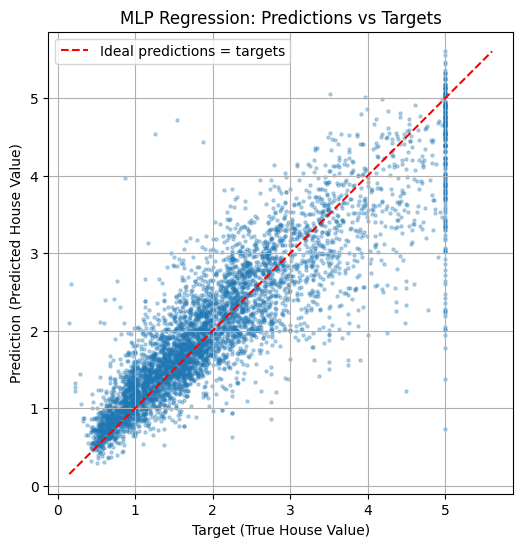

In [55]:
plt.figure(figsize=(6, 6))

plt.scatter(y_test, y_pred, s=5, alpha=0.3)

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    'r--',
    label="Ideal predictions = targets"
)

plt.axis("equal")
plt.xlabel("Target (True House Value)")
plt.ylabel("Prediction (Predicted House Value)")
plt.legend()
plt.grid()
plt.title("MLP Regression: Predictions vs Targets")

plt.show()

Each dot represents one house.
	•	X-axis (Target) → actual house price (ground truth)
	•	Y-axis (Prediction) → what the MLP predicted
Red dashed line = perfection

Point to the red line and say:

“This red dashed line represents perfect predictions.”

	•	If prediction = target → point lies exactly on the line
	•	Closer to the line → better prediction
	•	Far from the line → larger error

MLP Classification with Fashion-MNIST

## Fashion-MNIST Dataset

Fashion-MNIST is a dataset of grayscale images of clothing items.
Each image is:
- Size: 28 × 28 pixels
- Flattened to 784 features
- Belongs to one of 10 clothing categories

This dataset is commonly used to benchmark classification models.

In [65]:
!pip install torch torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np

Load Fashion-MNIST Dataset

In [66]:
transform = transforms.Compose([
    transforms.ToTensor(),  # converts to [0,1]
])

train_dataset = datasets.FashionMNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.FashionMNIST(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

100.0%
100.0%
100.0%
100.0%


Data Loaders

In [67]:
train_loader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=False
)

Visualize Dataset

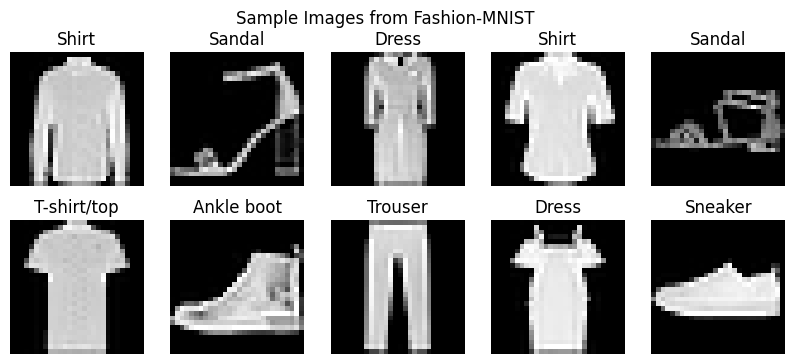

In [68]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

images, labels = next(iter(train_loader))

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.suptitle("Sample Images from Fashion-MNIST")
plt.show()

In [69]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 200),
            nn.ReLU(),
            nn.Linear(200, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        return self.model(x)

Initialize Model, Loss, Optimizer

In [70]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = MLP().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Training 

In [71]:
epochs = 5

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/5, Loss: 0.5330
Epoch 2/5, Loss: 0.3781
Epoch 3/5, Loss: 0.3374
Epoch 4/5, Loss: 0.3118
Epoch 5/5, Loss: 0.2917


## MLP Architecture

- Input layer: 784 neurons
- Hidden layers: 2 layers with 100 neurons each
- Activation: ReLU
- Output layer: 10 neurons (Softmax internally)

Evaluate the Model

In [72]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8776


Visualize Predictions

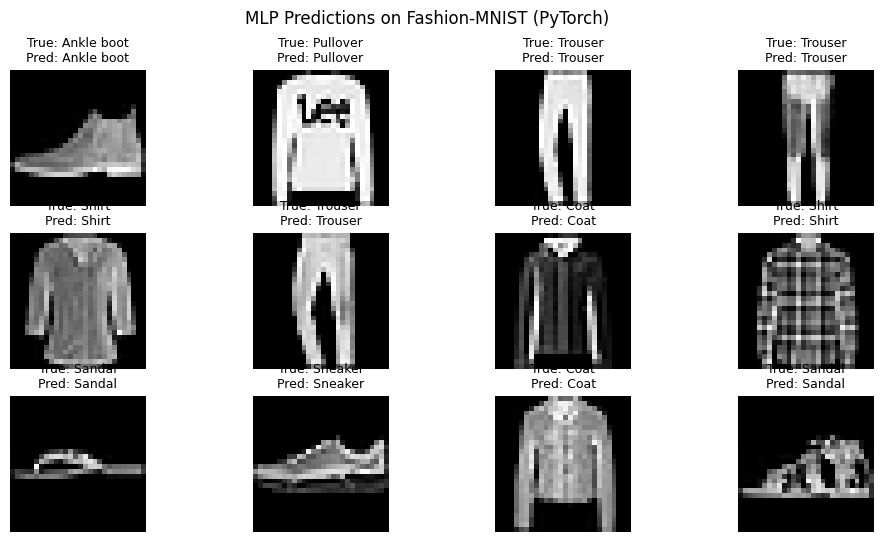

In [73]:
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

model.eval()
with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

plt.figure(figsize=(12, 6))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].cpu().squeeze(), cmap="gray")
    plt.title(
        f"True: {class_names[labels[i]]}\nPred: {class_names[preds[i]]}",
        fontsize=9
    )
    plt.axis("off")

plt.suptitle("MLP Predictions on Fashion-MNIST (PyTorch)")
plt.show()

## Interpretation

- The MLP achieves strong classification accuracy
- Confusions occur between visually similar classes


The MLP consists of fully connected layers with ReLU activations and is trained
using backpropagation and gradient descent.

This example demonstrates how neural networks can learn meaningful
representations directly from pixel values.

## Key Takeaways

- MLPs can handle high-dimensional image data
- Hidden layers learn abstract visual features
- Some classes are inherently harder to distinguish
- Visualization helps diagnose model behavior
- This approach bridges classical ML and deep learning

The model doesn’t see clothes — it only sees numbers.